# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hadriana Nurul Pertiwi
- **Email:** tiwip0961@gmail.com
- **ID Dicoding:** hadriananp

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan bike sharing antara pengguna casual dan registered berdasarkan musim dan kondisi cuaca?
- Bagaimana tren penyewaan sepeda pada hari kerja vs hari libur, dan bagaimana pengaruhnya terhadap total penyewaan pada jam-jam tertentu?
- Seberapa besar pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [16]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:** Dari hasil output dua dataset di atas bisa kita lihat bahwa terdapat beberapa kolom penitng yang menyusun kedua dataset tersebut seperti:
- instant: Index catatan/no urut.
- dteday: Tanggal data diambil.
- season: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun, 0 untuk 2011 dan 1 untuk 2012.
- mnth: Bulan dari 1 hingga 12.
- hr: Jam dalam format 24 jam.
- holiday: 1 jika hari tersebut libur atau akhir pekan, 0 jika bukan libur.
- weekday: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
- workingday: 1 jika hari kerja (bukan libur), 0 jika tidak.
- weathersit: Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, salju ringan, 4 = hujan lebat/kabut, salju).
- temp: Suhu aktual dalam skala 0 hingga 1.
- atemp: Suhu "feels like" atau suhu yang dirasakan.
- hum: Kelembapan dalam skala 0 hingga 1.
- windspeed: Kecepatan angin dalam skala 0 hingga 1.
- casual: Jumlah pengguna casual (tanpa registrasi).
- registered: Jumlah pengguna terdaftar.
- cnt: Jumlah total sepeda sewaan termasuk yang kcsual dan terdaftar.


Kedua dataset tersebut memiliki perbedaan, dimana pada dataset hour terdapat kolom hr sedangkan dataset day tidak mempunya kolom hr tersebut

### Assessing Data

In [23]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset memiliki **11,379** baris dengan **17** kolom
- Semua kolom memiliki tipe data yang sesuai terkecuali kolom dteday yang besar kemungkinan harusnya memiliki tipe data datetime

In [27]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset tidak memiliki missing value
- Dataset tidak memiliki data yang duplikat

In [25]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset memiliki **731** baris dengan **16** kolom
- Sama seperti dataset hour, dataset day ini kolom memiliki tipe data yang sesuai terkecuali kolom dteday yang besar kemungkinan harusnya memiliki tipe data datetime

In [31]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset tidak memiliki missing value
- Dataset tidak memiliki data yang duplikat

In [62]:
# Melihat statistik dasar untuk mengidentifikasi potensi outlier
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_hour[numeric_columns].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


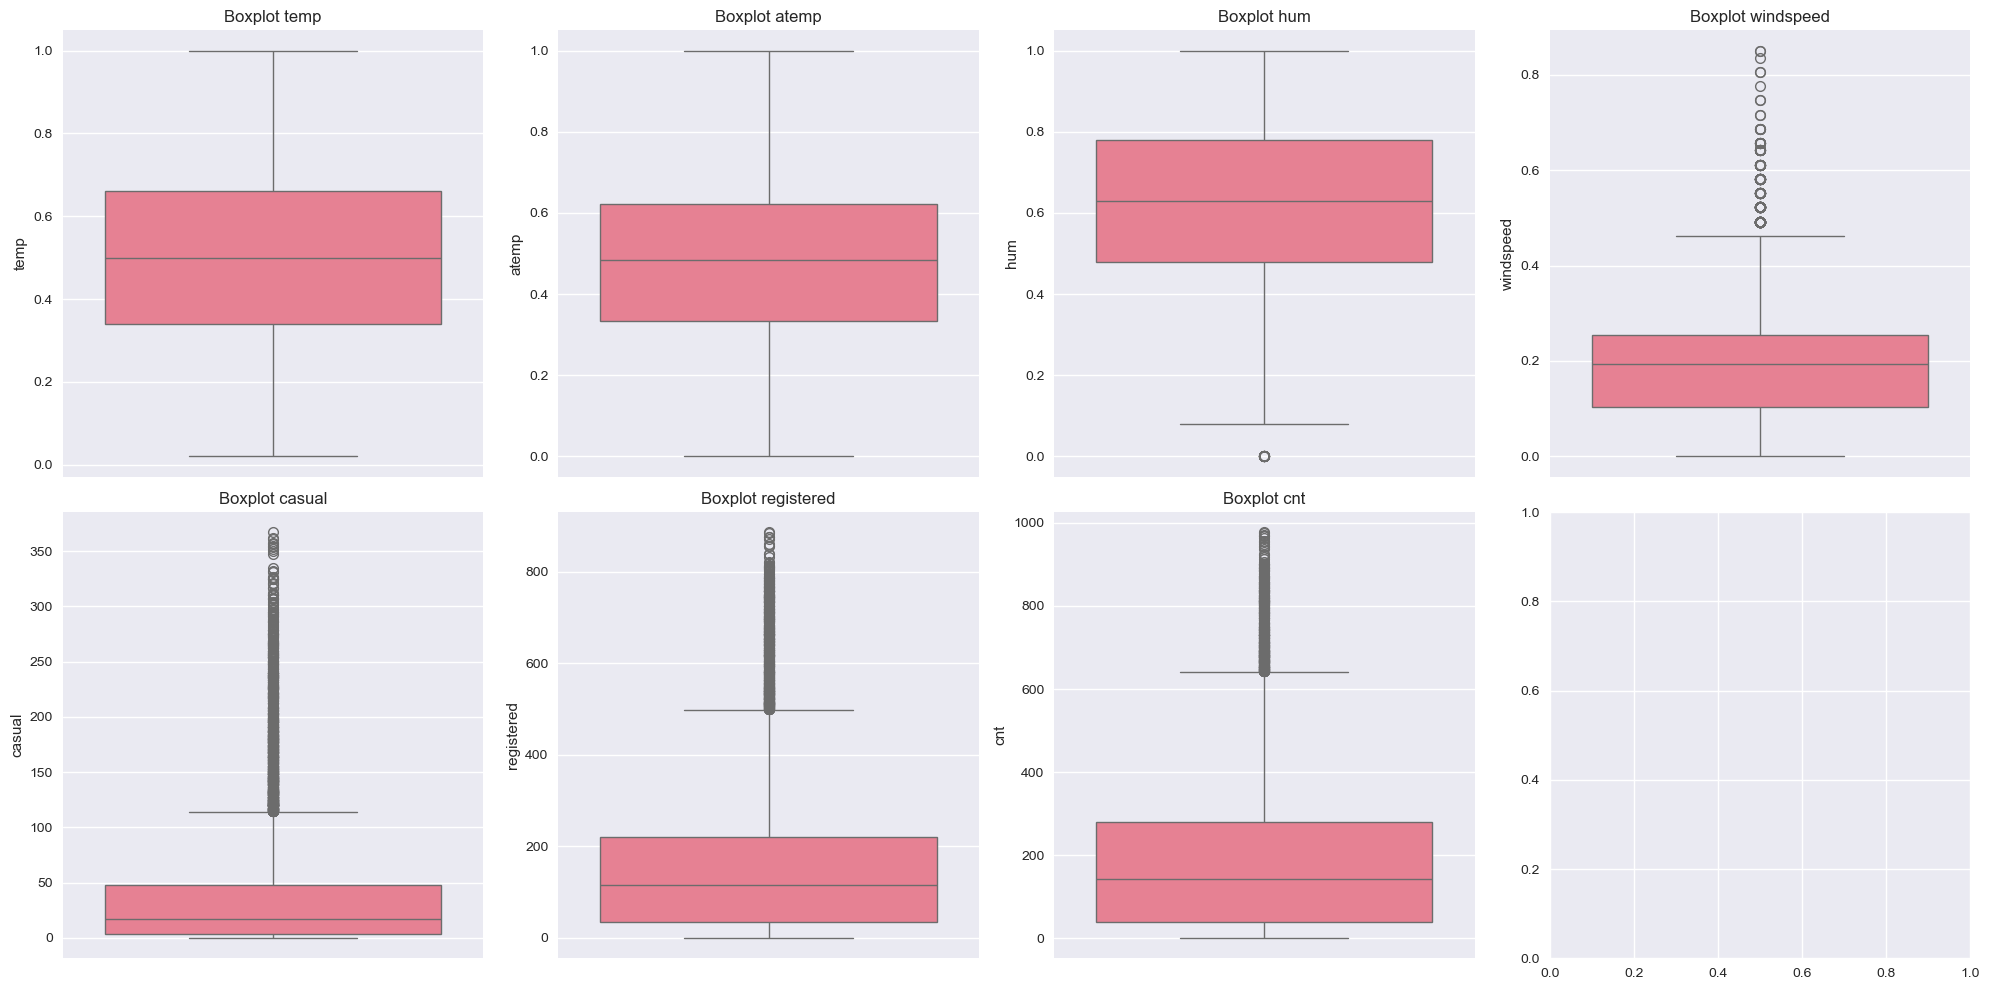


Outlier untuk temp:
Jumlah outlier: 0
Persentase outlier: 0.00%
Lower bound: -0.14
Upper bound: 1.14
Nilai minimum outlier: nan
Nilai maximum outlier: nan

Outlier untuk atemp:
Jumlah outlier: 0
Persentase outlier: 0.00%
Lower bound: -0.10
Upper bound: 1.05
Nilai minimum outlier: nan
Nilai maximum outlier: nan

Outlier untuk hum:
Jumlah outlier: 22
Persentase outlier: 0.13%
Lower bound: 0.03
Upper bound: 1.23
Nilai minimum outlier: 0.00
Nilai maximum outlier: 0.00

Outlier untuk windspeed:
Jumlah outlier: 342
Persentase outlier: 1.97%
Lower bound: -0.12
Upper bound: 0.48
Nilai minimum outlier: 0.49
Nilai maximum outlier: 0.85

Outlier untuk casual:
Jumlah outlier: 1192
Persentase outlier: 6.86%
Lower bound: -62.00
Upper bound: 114.00
Nilai minimum outlier: 115.00
Nilai maximum outlier: 367.00

Outlier untuk registered:
Jumlah outlier: 680
Persentase outlier: 3.91%
Lower bound: -245.00
Upper bound: 499.00
Nilai minimum outlier: 500.00
Nilai maximum outlier: 886.00

Outlier untuk cnt:
J

In [66]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    sns.boxplot(data=df_hour, y=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

# Untuk melihat jumlah outlier dengan metode IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    print(f"\nOutlier untuk {column}:")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {(len(outliers)/len(df))*100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    print(f"Nilai minimum outlier: {outliers.min():.2f}")
    print(f"Nilai maximum outlier: {outliers.max():.2f}")

for column in numeric_columns:
    detect_outliers(df_hour, column)

### Cleaning Data

In [85]:
def clean_dataset(df, is_hourly=True):
    # Salin dataset
    df = df.copy()
    
    # Ubah dteday menjadi format datetime
    df['dteday'] = pd.to_datetime(df['dteday'])
    
    # Pemetaan untuk kategori
    season_map = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}
    weather_map = {1: 'Cerah', 2: 'Berkabut', 3: 'Hujan/Salju Ringan', 4: 'Hujan/Salju Lebat'}

    # Denormalisasi kolom numerik
    df['temp_actual'] = df['temp'] * 41
    df['atemp_actual'] = df['atemp'] * 50
    df['hum_actual'] = df['hum'] * 100
    df['windspeed_actual'] = df['windspeed'] * 67
    
    df['season'] = df['season'].map(season_map)
    df['weathersit'] = df['weathersit'].map(weather_map)
    
    return df

In [87]:
# Bersihkan data harian
df_day_clean = clean_dataset(df_day)

# Bersihkan data per jam
df_hour_clean = clean_dataset(df_hour)

In [89]:
df_hour_clean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,temp_actual,atemp_actual,hum_actual,windspeed_actual
0,1,2011-01-01,Musim Semi,0,1,0,0,6,0,Cerah,...,0.2879,0.81,0.0,3,13,16,9.84,14.395,81.0,0.0
1,2,2011-01-01,Musim Semi,0,1,1,0,6,0,Cerah,...,0.2727,0.80,0.0,8,32,40,9.02,13.635,80.0,0.0
2,3,2011-01-01,Musim Semi,0,1,2,0,6,0,Cerah,...,0.2727,0.80,0.0,5,27,32,9.02,13.635,80.0,0.0
3,4,2011-01-01,Musim Semi,0,1,3,0,6,0,Cerah,...,0.2879,0.75,0.0,3,10,13,9.84,14.395,75.0,0.0
4,5,2011-01-01,Musim Semi,0,1,4,0,6,0,Cerah,...,0.2879,0.75,0.0,0,1,1,9.84,14.395,75.0,0.0


**Insight:**
- Mengubah tipe data pada kolom dteday yang sebelumnya object menjadi datetime
- Memberikan label kategori pada kolom season dan juga weathersit

In [91]:
df_hour_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   season            17379 non-null  object        
 3   yr                17379 non-null  int64         
 4   mnth              17379 non-null  int64         
 5   hr                17379 non-null  int64         
 6   holiday           17379 non-null  int64         
 7   weekday           17379 non-null  int64         
 8   workingday        17379 non-null  int64         
 9   weathersit        17379 non-null  object        
 10  temp              17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  hum               17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual            1737

In [93]:
df_day_clean.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_actual,atemp_actual,hum_actual,windspeed_actual
0,1,2011-01-01,Musim Semi,0,1,0,6,0,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,80.5833,10.749882
1,2,2011-01-02,Musim Semi,0,1,0,0,0,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695,69.6087,16.652113
2,3,2011-01-03,Musim Semi,0,1,0,1,1,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025,43.7273,16.636703
3,4,2011-01-04,Musim Semi,0,1,0,2,1,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610,59.0435,10.739832
4,5,2011-01-05,Musim Semi,0,1,0,3,1,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350,43.6957,12.522300


In [95]:
df_day_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dteday            731 non-null    datetime64[ns]
 2   season            731 non-null    object        
 3   yr                731 non-null    int64         
 4   mnth              731 non-null    int64         
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    object        
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [97]:
# Simpan data yang sudah dibersihkan
df_hour_clean.to_csv('bike_sharing_hourly_cleaned.csv', index=False)
df_day_clean.to_csv('bike_sharing_daily_cleaned.csv', index=False)
print("Data telah disimpan ke file CSV")

Data telah disimpan ke file CSV


## Exploratory Data Analysis (EDA)

### Casual vs Registered

In [99]:
# Analisis berdasarkan musim
seasonal_usage = df_day_clean.groupby('season')[['casual', 'registered']].mean()
print("\nRata-rata penggunaan berdasarkan musim:")
seasonal_usage


Rata-rata penggunaan berdasarkan musim:


,casual,registered
season,,
Musim Dingin,729.112360,3999.050562
Musim Gugur,1202.611702,4441.691489
Musim Panas,1106.097826,3886.233696
Musim Semi,334.928177,2269.204420


**Insight:** Berdasarkan Musim
- Terdapat perbedaan signifikan antara pengguna registered dan casual di setiap musim, dengan pengguna registered selalu mendominasi
- Musim Gugur menjadi puncak penggunaan untuk pengguna registered (rata-rata 4,441 rental/hari)
- Musim Semi menunjukkan penggunaan terendah untuk kedua kategori pengguna (registered: 2,269/hari, casual: 334/hari)
- Pengguna casual menunjukkan variasi musiman yang lebih ekstrem, dengan perbedaan hampir 4x lipat antara musim tertinggi dan terendah

In [101]:
# Analisis berdasarkan cuaca
weather_usage = df_day_clean.groupby('weathersit')[['casual', 'registered']].mean()
print("\nRata-rata penggunaan berdasarkan cuaca:")
weather_usage


Rata-rata penggunaan berdasarkan cuaca:


,casual,registered
weathersit,,
Berkabut,687.352227,3348.510121
Cerah,964.030238,3912.755940
Hujan/Salju Ringan,185.476190,1617.809524


**Insight:** Berdasarkan Kondisi Cuaca
- Cuaca cerah menghasilkan penggunaan tertinggi (registered: 3,912/hari, casual: 964/hari)
- Hujan/salju ringan berdampak sangat signifikan, menurunkan penggunaan hingga 80% untuk pengguna casual
- Pengguna registered menunjukkan ketahanan lebih baik terhadap kondisi cuaca buruk

### Tren Hari Kerja vs Hari Libur

In [103]:
# Analisis pola per jam berdasarkan workingday
hourly_patterns = df_hour_clean.pivot_table(
    values='cnt',
    index='hr',
    columns='workingday',
    aggfunc='mean'
)

# Statistik deskriptif
print("\nStatistik penggunaan hari kerja vs libur:")
df_hour_clean.groupby('workingday')['cnt'].describe()


Statistik penggunaan hari kerja vs libur:


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,5514.0,181.405332,172.853832,1.0,40.0,119.0,292.0,783.0
1,11865.0,193.207754,185.107477,1.0,40.0,151.0,277.0,977.0


**Insight:**
- Hari kerja memiliki rata-rata penggunaan sedikit lebih tinggi (193 sepeda/jam) dibanding hari libur (181 sepeda/jam)
- Variasi penggunaan di hari kerja lebih tinggi (std: 185.1) dibanding hari libur (std: 172.8)

### Pengaruh Faktor Cuaca

In [105]:
# Korelasi antara faktor cuaca dan jumlah rental
weather_factors = ['temp_actual', 'hum_actual', 'windspeed_actual', 'cnt']
correlation = df_hour_clean[weather_factors].corr()

# Statistik deskriptif berdasarkan kondisi cuaca
print("\nStatistik penggunaan berdasarkan kondisi cuaca:")
df_hour_clean.groupby('weathersit')['cnt'].describe()


Statistik penggunaan berdasarkan kondisi cuaca:


,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
Berkabut,4544.0,175.165493,165.431589,1.0,40.0,133.0,257.0,957.0
Cerah,11413.0,204.869272,189.487773,1.0,46.0,159.0,304.0,977.0
Hujan/Salju Lebat,3.0,74.333333,77.925178,23.0,29.5,36.0,100.0,164.0
Hujan/Salju Ringan,1419.0,111.579281,133.781045,1.0,21.0,63.0,152.5,891.0


**Insight:**
- Cuaca cerah menghasilkan rata-rata penggunaan tertinggi (204.9 sepeda/jam)
- Kondisi berkabut menurunkan penggunaan menjadi rata-rata 175.2 sepeda/jam
- Hujan/salju ringan menurunkan penggunaan secara drastis (111.6 sepeda/jam)
- Hujan/salju lebat memiliki dampak paling signifikan, dengan penggunaan hanya 74.3 sepeda/jam

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan bike sharing antara pengguna casual dan registered berdasarkan musim dan kondisi cuaca?

<Figure size 1200x600 with 0 Axes>

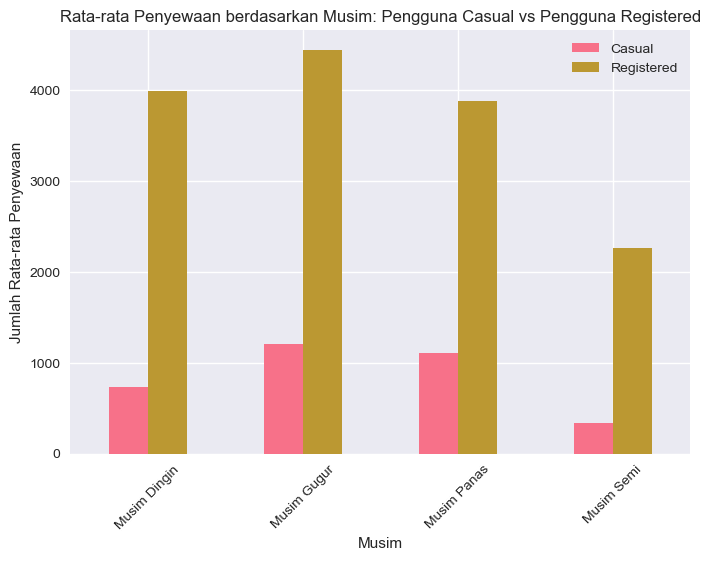

In [137]:
# Visualisasi berdasarkan musim
plt.figure(figsize=(12, 6))
seasonal_usage.plot(kind='bar')
plt.title('Rata-rata Penyewaan berdasarkan Musim: Pengguna Casual vs Pengguna Registered')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.legend(['Casual', 'Registered'])
plt.show()

<Figure size 1200x600 with 0 Axes>

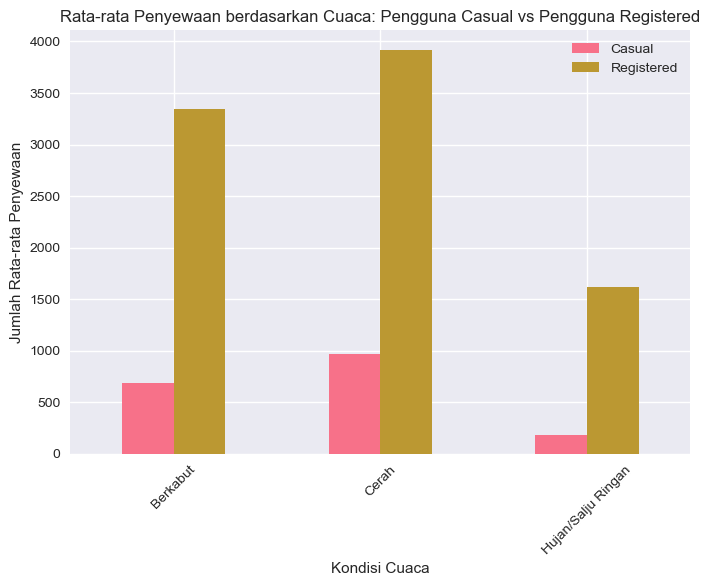

In [127]:
# Visualisasi berdasarkan cuaca
plt.figure(figsize=(12, 6))
weather_usage.plot(kind='bar')
plt.title('Rata-rata Penyewaan berdasarkan Cuaca: Pengguna Casual vs Pengguna Registered')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.xticks(rotation=45)
plt.legend(['Casual', 'Registered'])
plt.show()

### Pertanyaan 2: Bagaimana tren penyewaan sepeda pada hari kerja vs hari libur, dan bagaimana pengaruhnya terhadap total penyewaan pada jam-jam tertentu?

<Figure size 1200x600 with 0 Axes>

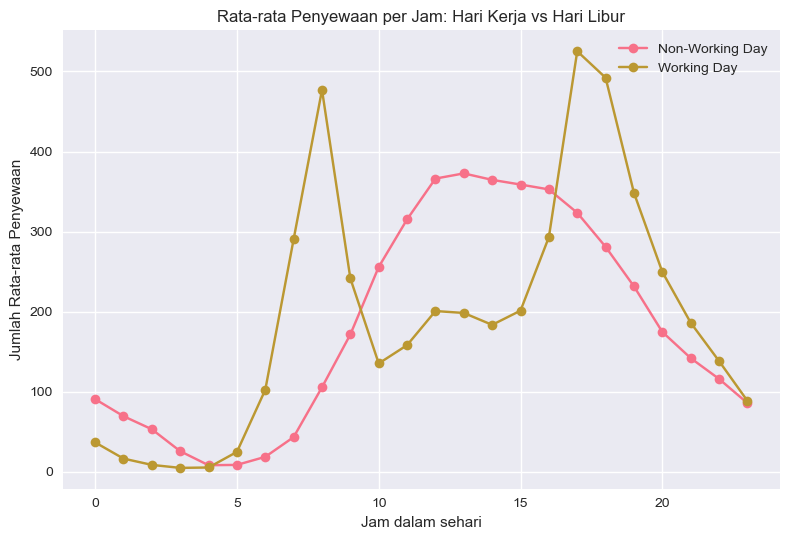

In [149]:
# Line plot untuk pola per jam
plt.figure(figsize=(12, 6))
hourly_patterns.plot(marker='o')
plt.title('Rata-rata Penyewaan per Jam: Hari Kerja vs Hari Libur')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Jumlah Rata-rata Penyewaan')
plt.legend(['Non-Working Day', 'Working Day'])
plt.grid(True)
plt.tight_layout()
plt.show()

# # Heatmap penggunaan jam vs hari
# plt.figure(figsize=(12, 8))
# weekly_hourly = df_hour_clean.pivot_table(
#     values='cnt',
#     index='hr',
#     columns='weekday',
#     aggfunc='mean'
# )
# sns.heatmap(weekly_hourly, cmap='YlOrRd', annot=False)
# plt.title('Heatmap of Rentals: Hour vs Day of Week')
# plt.xlabel('Day of Week (0=Sunday)')
# plt.ylabel('Hour of Day')
# plt.tight_layout()
# plt.show()

**Insight:**
- Pola penggunaan hari kerja menunjukkan dua puncak yang jelas:
  - Puncak pagi sekitar jam kerja (commuting time)
  - Puncak sore saat jam pulang kerja

  

- Hari libur memiliki pola yang lebih merata sepanjang hari dengan:
  - Peningkatan gradual dari pagi hingga siang
  - Puncak penggunaan di sekitar tengah hari
  - Penurunan lebih lambat di sore hari

### Pertanyaan 3: Seberapa besar pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?

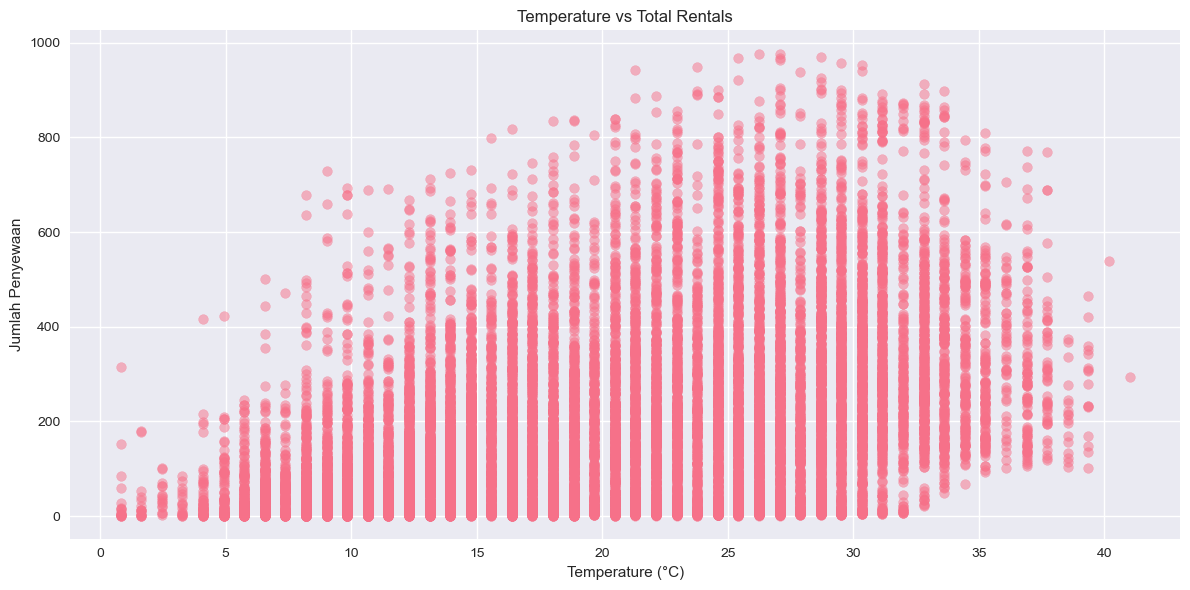

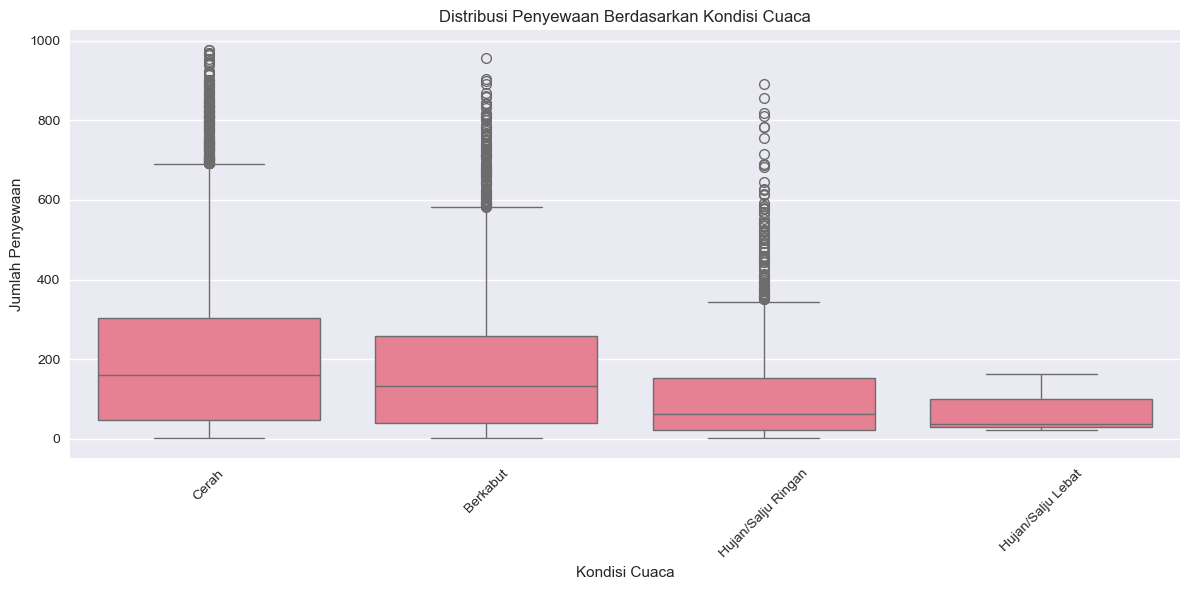

In [133]:
# Scatter plot temperature vs rentals
plt.figure(figsize=(12, 6))
plt.scatter(df_hour_clean['temp_actual'], df_hour_clean['cnt'], alpha=0.5)
plt.title('Temperature vs Total Rentals')
plt.xlabel('Temperature (°C)')
plt.ylabel('Jumlah Penyewaan')
plt.tight_layout()
plt.show()

# # Heatmap korelasi
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation between Weather Factors and Rentals')
# plt.tight_layout()
# plt.show()

# Box plot rentals berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=df_hour_clean)
plt.title('Distribusi Penyewaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion

- **Kesimpulan Pola Penggunaan Bike Sharing antara Pengguna Casual vs Registered:**
"Analisis menunjukkan perbedaan pola yang signifikan antara pengguna casual dan registered. Pengguna registered secara konsisten mendominasi penggunaan di semua musim, dengan puncak penggunaan di musim gugur (rata-rata 4,441 rental/hari) dan terendah di musim semi (2,269 rental/hari). Pengguna casual menunjukkan variasi musiman yang lebih ekstrem, dengan penggunaan tertinggi di musim gugur (1,202 rental/hari) dan terendah di musim semi (334 rental/hari). Dari sisi cuaca, kedua jenis pengguna menunjukkan kecenderungan pilihan tertinggi saat cuaca cerah, namun pengguna registered lebih memperlihatkan ketahanan yang baik untuk kondisi cuaca buruk. Kondisi hujan/salju ringan memberikan dampak penurunan yang lebih signifikan pada pengguna casual dibandingkan registered."
- **Kesimpulan Tren Penyewaan Hari Kerja vs Hari Libur:**
"Terdapat perbedaan pola yang jelas antara penggunaan di hari kerja dan hari libur. Hari kerja menunjukkan dua puncak penggunaan yang distinct, yaitu pada pagi hari dan sore hari. Rata-rata penggunaan di hari kerja (193 sepeda/jam) sedikit lebih tinggi dibanding hari libur (181 sepeda/jam). Sementara itu, hari libur memperlihatkan pola yang lebih merata sepanjang hari dengan puncak di tengah hari. Variabilitas penggunaan di hari kerja (std: 185.1) juga lebih tinggi dibandingkan hari libur (std: 172.8), menunjukkan konsentrasi penggunaan yang lebih tinggi pada jam-jam tertentu."
- **Kesimpulan Pengaruh Faktor Cuaca:**
"Faktor cuaca memiliki pengaruh yang penting terhadap jumlah penyewaan sepeda. Cuaca cerah menghasilkan rata-rata penggunaan tertinggi (204.9 sepeda/jam), sementara kondisi berkabut menurunkan penggunaan menjadi rata-rata 175.2 sepeda/jam. Dampak paling signifikan terlihat pada kondisi hujan/salju ringan yang menurunkan penggunaan hingga 111.6 sepeda/jam, dan kondisi hujan/salju lebat yang menurunkan penggunaan secara drastis menjadi hanya 74.3 sepeda/jam. Data ini mengindikasikan bahwa kondisi cuaca menjadi salah satu faktor penentu utama dalam keputusan pengguna untuk menyewa sepeda, dengan pengaruh yang lebih kuat pada pengguna casual dibandingkan pengguna registered."